In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([
    [2.5, 2.4],
    [0.5, 0.7],
    [2.2, 2.9],
    [1.9, 2.2],
    [3.1, 3.0],
    [2.3, 2.7],
    [2, 1.6],
    [1, 1.1],
    [1.5, 1.6],
    [1.1, 0.9]
])

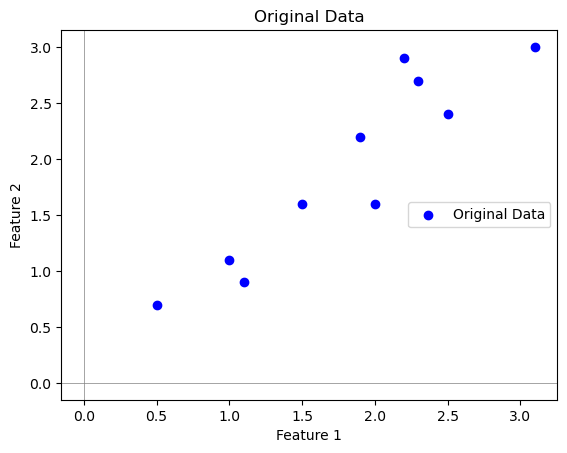

In [2]:
plt.scatter(X[:, 0], X[:, 1], color='blue', label='Original Data')
plt.axhline(0, color='grey', lw=0.5)
plt.axvline(0, color='grey', lw=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Original Data')
plt.show()

In [3]:
#Step1: Standardize
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
X_standardized = (X - mean) / std
print("Standardized Data:\n", X_standardized)

Standardized Data:
 [[ 0.92627881  0.61016865]
 [-1.7585873  -1.506743  ]
 [ 0.52354889  1.23278973]
 [ 0.12081898  0.36112022]
 [ 1.73173864  1.35731394]
 [ 0.6577922   0.9837413 ]
 [ 0.25506228 -0.38602507]
 [-1.08737078 -1.00864614]
 [-0.41615425 -0.38602507]
 [-0.95312747 -1.25769457]]


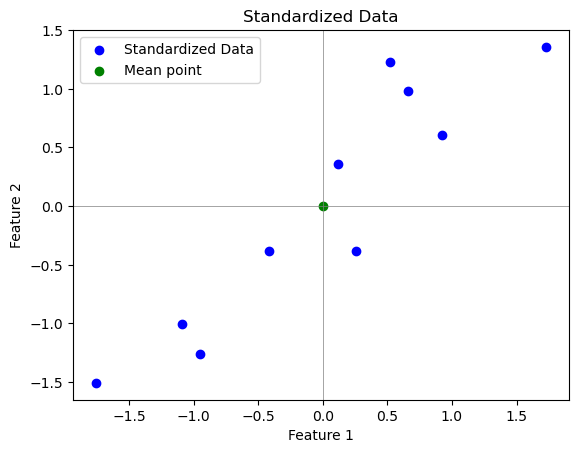

In [4]:
plt.scatter(X_standardized[:, 0], X_standardized[:, 1], color='blue', label='Standardized Data')
plt.scatter([0], [0], color='green', label='Mean point')
plt.axhline(0, color='grey', lw=0.5)
plt.axvline(0, color='grey', lw=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Standardized Data')
plt.show()

In [5]:
#Step 2: Covariance matrix
cov_matrix = np.cov(X_standardized, rowvar=False)
print("Covariance Matrix:\n", cov_matrix)

Covariance Matrix:
 [[1.11111111 1.0288103 ]
 [1.0288103  1.11111111]]


In [6]:
#Step 3: Finding Eigenvalues and Eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print("Eigenvalues:\n", eigenvalues)
print("Eigenvectors:\n", eigenvectors)

Eigenvalues:
 [2.13992141 0.08230081]
Eigenvectors:
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


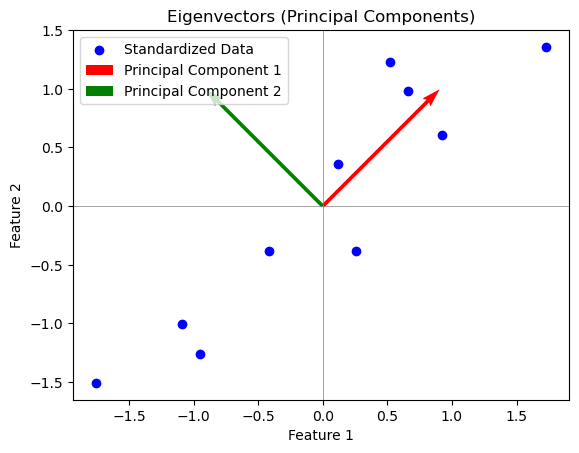

In [7]:
plt.scatter(X_standardized[:, 0], X_standardized[:, 1], color='blue', label='Standardized Data')
origin = [0, 0]
plt.quiver(*origin, eigenvectors[0, 0], eigenvectors[1, 0], color=['r'], scale=3, label='Principal Component 1')
plt.quiver(*origin, eigenvectors[0, 1], eigenvectors[1, 1], color=['g'], scale=3, label='Principal Component 2')
plt.axhline(0, color='grey', lw=0.5)
plt.axvline(0, color='grey', lw=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Eigenvectors (Principal Components)')
plt.show()

In [8]:
# Step 4: Finding Principal compnent
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Select the top eigenvector (principal component 1)
principal_component = sorted_eigenvectors[:, 0].reshape(-1, 1)
print("Principal Component:\n", principal_component)

Principal Component:
 [[0.70710678]
 [0.70710678]]


In [9]:
#Step 5: Project data on to principal component
X_reduced = X_standardized.dot(principal_component)
print("Projected Data (1D):\n", X_reduced)

Projected Data (1D):
 [[ 1.08643242]
 [-2.3089372 ]
 [ 1.24191895]
 [ 0.34078247]
 [ 2.18429003]
 [ 1.16073946]
 [-0.09260467]
 [-1.48210777]
 [-0.56722643]
 [-1.56328726]]


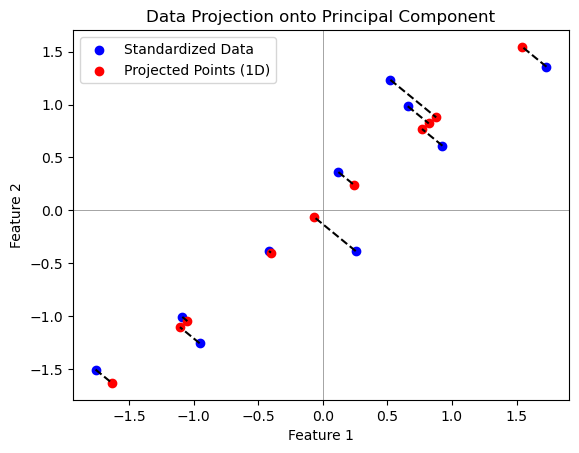

In [10]:
plt.scatter(X_standardized[:, 0], X_standardized[:, 1], color='blue', label='Standardized Data')
for i in range(len(X_reduced)):
    proj = X_reduced[i] * principal_component.T
    plt.plot([X_standardized[i, 0], proj[0, 0]], [X_standardized[i, 1], proj[0, 1]], 'k--')
plt.scatter(X_reduced * principal_component[0, 0], X_reduced * principal_component[1, 0], color='red', label='Projected Points (1D)')
plt.axhline(0, color='grey', lw=0.5)
plt.axvline(0, color='grey', lw=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Data Projection onto Principal Component')
plt.show()